In [169]:
import torch

In [170]:
input_img = torch.randn((1,10))

In [171]:
input_img

tensor([[-1.4157,  0.0629,  1.3937, -0.8039, -0.7437,  0.2599, -0.2870, -0.9434,
          1.9552, -0.5406]])

In [172]:
weights = torch.randn_like(input_img)

In [173]:
weights

tensor([[ 0.4620, -0.6529,  0.4855,  0.5257,  0.0273, -0.9668,  0.1271, -0.9317,
          1.0186,  0.4945]])

In [174]:
bias = torch.randn((1,1))

In [175]:
bias

tensor([[1.4110]])

In [176]:
out = torch.sum(input_img * weights) + bias

In [177]:
out

tensor([[3.2651]])

In [178]:
def sigmoid(x):
    ret = 1/(1 + torch.exp(-x))
    return ret

In [179]:
out = sigmoid(out)

In [180]:
out

tensor([[0.9632]])

# Using Matrix Multiplication

In [181]:
out = torch.mm(input_img , weights.view(10,1)) + bias

In [182]:
out

tensor([[3.2651]])

# Mutli Neurons

In [183]:
input_img = torch.randn((1,3))

In [184]:
n_inputs = input_img.shape[1]
n_neurons = 2
n_outputs = 1

In [185]:
w1 = torch.randn((n_inputs,n_neurons))
w2 = torch.randn((n_neurons,n_outputs))

In [186]:
B1 = torch.randn((1,n_neurons))
B2 = torch.randn((1,n_outputs))

In [187]:
h1 = sigmoid(torch.mm(input_img , w1) + B1)
output = sigmoid(torch.mm(h1 , w2) + B2)

In [188]:
output

tensor([[0.4817]])

# Autograd

In [189]:
x = torch.randn((1,5), requires_grad=True)

In [190]:
x

tensor([[-0.8751, -0.4136, -0.8943,  0.1253, -0.7324]], requires_grad=True)

In [191]:
b = x + 2

In [192]:
b

tensor([[1.1249, 1.5864, 1.1057, 2.1253, 1.2676]], grad_fn=<AddBackward0>)

In [193]:
c = b * 2

In [194]:
c

tensor([[2.2499, 3.1727, 2.2114, 4.2506, 2.5351]], grad_fn=<MulBackward0>)

In [195]:
c = c.mean()

In [196]:
c

tensor(2.8840, grad_fn=<MeanBackward0>)

In [197]:
x.grad

In [198]:
c.backward()

In [199]:
c

tensor(2.8840, grad_fn=<MeanBackward0>)

In [200]:
x.grad

tensor([[0.4000, 0.4000, 0.4000, 0.4000, 0.4000]])

# MNIST Dataset

In [201]:
import torchvision
import matplotlib.pyplot as plt

https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

## Transform

https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html#torchvision.transforms.Compose

In [238]:
from torchvision import transforms

In [239]:
transform = transforms.Compose([transforms.ToTensor()])

In [240]:
trainset = torchvision.datasets.MNIST(root = "./data", train = True, transform = transform, target_transform = None, download = True)

In [241]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
trainloader

In [242]:
for images, labels in trainloader:
    print(images.size(),labels.size())
    break

torch.Size([64, 1, 28, 28]) torch.Size([64])


Another way rather than for loop using iter

In [207]:
batches = iter(trainloader)

In [208]:
one_batch = next(batches)

In [209]:
images,labels = one_batch

In [210]:
print(images.size(),labels.size())

torch.Size([64, 1, 28, 28]) torch.Size([64])


In [211]:
#!pip install matplot

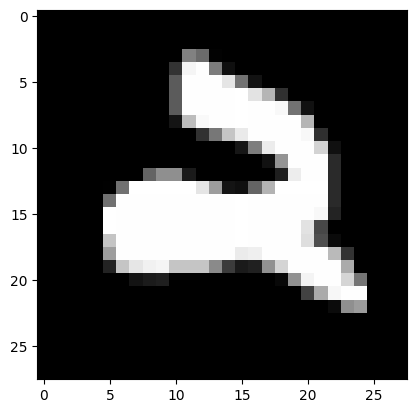

In [212]:
plt.imshow(images[0].numpy().squeeze(),cmap='Greys_r')

----------
# Single Epoch Training

In [224]:
from torch import nn, optim

In [214]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(28*28, 512) # 28*28 image size, 512 neurons
        self.output = nn.Linear(512, 10) #10 output as MNIST
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.LogSoftmax(dim=1) # dim=q take place colum wise not raw
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [215]:
model = Net()

In [216]:
model

Net(
  (hidden): Linear(in_features=784, out_features=512, bias=True)
  (output): Linear(in_features=512, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): LogSoftmax(dim=1)
)

In [217]:
## Define the Loss

In [218]:
criterion = nn.NLLLoss()

In [219]:
batches = iter(trainloader)
images, labels = next(batches)

In [220]:
images = images.view(images.shape[0],-1)

In [221]:
images.size()

torch.Size([64, 784])

In [222]:
logist = model(images)

# Forward prop

loss = criterion(logist, labels)
loss

tensor(2.4024, grad_fn=<NllLossBackward0>)

In [223]:
loss.backward()

In [225]:
optimizer = optim.SGD(model.parameters(),lr=0.01)# lr = learning rte

In [226]:
optimizer.step()

# Full Training

In [227]:
for epoch in range(5):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        logits = model(images)
        loss = criterion(logits,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("The running loss is : {}".format(running_loss/len(trainloader)))
     

The running loss is : 2.097097349065199
The running loss is : 1.4608847910661433
The running loss is : 0.9571693355976137
The running loss is : 0.7244098020642042
The running loss is : 0.6055479704507633


# Inference

In [228]:
images, labels = next(iter(trainloader))

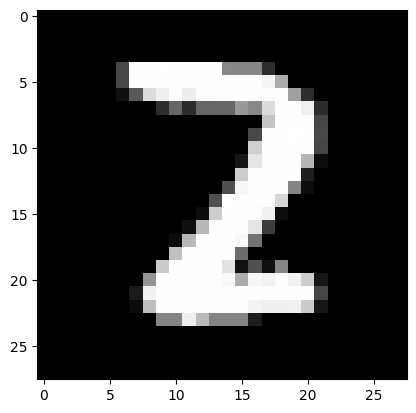

In [230]:
img = images[0]
plt.imshow(img.numpy().squeeze(),cmap='Greys_r')

In [231]:
img = img.view(1,-1)

In [232]:
with torch.no_grad():
    logprobs = model(img)

In [233]:
logprobs

tensor([[-7.8036, -4.7125, -0.1460, -3.0430, -7.6762, -6.6254, -6.5259, -7.3721,
         -2.5976, -7.7066]])

In [234]:
probs = torch.exp(logprobs)

In [235]:
probs

tensor([[4.0825e-04, 8.9820e-03, 8.6413e-01, 4.7691e-02, 4.6374e-04, 1.3262e-03,
         1.4649e-03, 6.2856e-04, 7.4452e-02, 4.4983e-04]])

In [236]:
torch.sum(probs)

tensor(1.0000)

In [237]:
torch.argmax(probs)

tensor(2)